In [1]:
##


In [2]:
# You can verify the installation by running:
import nltk
print(nltk.__version__)

3.8.1


In [3]:
#Source used for code
#https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
#https://stackabuse.com/text-classification-with-python-and-scikit-learn/
#https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
#https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python
#https://www.datacamp.com/community/blog/text-mining-in-r-and-python-tips
import numpy as np 
import pandas as pd
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Change Directory
import os
#The OS module in Python provides a way of using operating system dependent functionality. 
#The functions that the OS module
#provides allows you to interface with the underlying operating system that Python is running on – 
#be that Windows, Mac or Linux
cwd = os.getcwd()
#The method getcwd() returns current working directory of a process
print(cwd)
# The method chdir() changes the current working directory to the given path
os.chdir(r"C:\Users\ponuku vijay\Desktop\NLP 3")
print(cwd)

C:\Users\ponuku vijay\Desktop\NLP 3
C:\Users\ponuku vijay\Desktop\NLP 3


In [5]:
#train = pd.read_csv("Dataset1.csv")
import pandas as pd
#df = pd.read_csv("Dataset1.csv")
df = pd.read_csv("reviews_2nd draft_1.csv")
df=df.dropna()
df

,reviewId,content,score,app
0,9ea89a05-fb4e-4b1b-97ad-c39ec71d56ae,"I've had Netflix since the DVD era, but this n...",1.0,Netflix
1,7b2a264c-7bb5-4729-b3d2-2168f8a7855e,I pay $18/month for an app that's super glitch...,2.0,Netflix
2,10faea27-b33d-40bb-b669-cf126438d525,Netflix plzz this kdrama dubbed in hindi . Hap...,5.0,Netflix
3,bdd267b4-4231-4a5d-b369-3ac9e5082fc5,Your device is not part of the Netflix Househo...,1.0,Netflix
4,fe550ddd-1ae5-4902-9593-824ecb9b6598,I give netflix a two because even though it is...,2.0,Netflix
...,...,...,...,...
89938,c24327e3-906c-42cf-a3dc-ab454e5ba461,Love Spotify and have use it for a long long t...,2.0,Spotify
89939,bd465561-f242-4845-820f-b8009198ac5c,The app has suddenly become inoperative for th...,2.0,Spotify
89940,9fd37531-c943-406b-97e2-49c9851f9790,"I love spotify, I use it every single day and ...",5.0,Spotify
89941,548be4dc-acff-4656-ab08-33227c893232,You can search up ANY song and it will prob be...,4.0,Spotify


In [6]:
#drop reviewId column
df=df.drop(['reviewId','app'],axis=1)

In [7]:
df.shape

(89943, 2)

In [8]:
df

,content,score
0,"I've had Netflix since the DVD era, but this n...",1.0
1,I pay $18/month for an app that's super glitch...,2.0
2,Netflix plzz this kdrama dubbed in hindi . Hap...,5.0
3,Your device is not part of the Netflix Househo...,1.0
4,I give netflix a two because even though it is...,2.0
...,...,...
89938,Love Spotify and have use it for a long long t...,2.0
89939,The app has suddenly become inoperative for th...,2.0
89940,"I love spotify, I use it every single day and ...",5.0
89941,You can search up ANY song and it will prob be...,4.0


In [9]:
#getting everything except Review_Type attribute
# iloc is a method in pandas used for  indexing to select rows and columns
# from a DataFrame or Series by their numerical index. 
X=df.iloc[:, 0:6]
X

,content,score
0,"I've had Netflix since the DVD era, but this n...",1.0
1,I pay $18/month for an app that's super glitch...,2.0
2,Netflix plzz this kdrama dubbed in hindi . Hap...,5.0
3,Your device is not part of the Netflix Househo...,1.0
4,I give netflix a two because even though it is...,2.0
...,...,...
89938,Love Spotify and have use it for a long long t...,2.0
89939,The app has suddenly become inoperative for th...,2.0
89940,"I love spotify, I use it every single day and ...",5.0
89941,You can search up ANY song and it will prob be...,4.0


In [10]:
#creating features set 
features = df.iloc[:, 0].values
features

array(["I've had Netflix since the DVD era, but this new pricing tactic is despicable. I will never waste a dollar on Netflix again.",
       "I pay $18/month for an app that's super glitchy. If I rewind or skip more than 20 secs when watching a show/movie, it stops playing and buffers for infinity. I have to back out of the show onto the main screen, then click back in, but it'll start the show from 10 minutes back, or it'll start on the previous episode that I just finished watching. Happens every time",
       'Netflix plzz this kdrama dubbed in hindi . Happiness .hometown cha cha cha . Hospital playlist . Doctor slump . School 2017 . Run on . Welcome to samdal-ri . Hidden love . Our beloved summer . Decent of the sun',
       ...,
       "I love spotify, I use it every single day and it is just the BEST app for listening to music. I do with that you can play things not on shuffle when you don't have premuim though, it does get quite annoying also have six skips. Love spotify! <3",


In [11]:
len(features)

89943

In [12]:
df

,content,score
0,"I've had Netflix since the DVD era, but this n...",1.0
1,I pay $18/month for an app that's super glitch...,2.0
2,Netflix plzz this kdrama dubbed in hindi . Hap...,5.0
3,Your device is not part of the Netflix Househo...,1.0
4,I give netflix a two because even though it is...,2.0
...,...,...
89938,Love Spotify and have use it for a long long t...,2.0
89939,The app has suddenly become inoperative for th...,2.0
89940,"I love spotify, I use it every single day and ...",5.0
89941,You can search up ANY song and it will prob be...,4.0


# Data Cleaning

In [13]:
#storing features array into df1 dataframe
import pandas as pd
df1 = pd.DataFrame({'content':features})
print(df1)

                                                 content
0      I've had Netflix since the DVD era, but this n...
1      I pay $18/month for an app that's super glitch...
2      Netflix plzz this kdrama dubbed in hindi . Hap...
3      Your device is not part of the Netflix Househo...
4      I give netflix a two because even though it is...
...                                                  ...
89938  Love Spotify and have use it for a long long t...
89939  The app has suddenly become inoperative for th...
89940  I love spotify, I use it every single day and ...
89941  You can search up ANY song and it will prob be...
89942  Yes Spotify is very good but the ads are absol...

[89943 rows x 1 columns]


In [14]:
#making it to lower case
df1['content'] =df1['content'].apply(lambda x: " ".join(x.lower()for x in str(x).split()))
## for loop here is to to split and join given string

# Python Lambda Functions are anonymous functions means that the function is without a name
df1['content']

0        i've had netflix since the dvd era, but this n...
1        i pay $18/month for an app that's super glitch...
2        netflix plzz this kdrama dubbed in hindi . hap...
3        your device is not part of the netflix househo...
4        i give netflix a two because even though it is...
                               ...                        
89938    love spotify and have use it for a long long t...
89939    the app has suddenly become inoperative for th...
89940    i love spotify, i use it every single day and ...
89941    you can search up any song and it will prob be...
89942    yes spotify is very good but the ads are absol...
Name: content, Length: 89943, dtype: object

In [15]:
#Removing Punctuation
df1['content'] = df1['content'].str.replace('[^\w\s]','')
df1['content']

# that's [^\w\s] which matches one character which does not belong to either
# the word or the whitespace group.

0        i've had netflix since the dvd era, but this n...
1        i pay $18/month for an app that's super glitch...
2        netflix plzz this kdrama dubbed in hindi . hap...
3        your device is not part of the netflix househo...
4        i give netflix a two because even though it is...
                               ...                        
89938    love spotify and have use it for a long long t...
89939    the app has suddenly become inoperative for th...
89940    i love spotify, i use it every single day and ...
89941    you can search up any song and it will prob be...
89942    yes spotify is very good but the ads are absol...
Name: content, Length: 89943, dtype: object

In [16]:
from nltk.corpus import stopwords
#remove stop words
stop = stopwords.words('english')
df1['content'] =df1['content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df1['content']

0        i've netflix since dvd era, new pricing tactic...
1        pay $18/month app that's super glitchy. rewind...
2        netflix plzz kdrama dubbed hindi . happiness ....
3        device part netflix householde good police way...
4        give netflix two even though good app lot grea...
                               ...                        
89938    love spotify use long long time family account...
89939    app suddenly become inoperative past two month...
89940    love spotify, use every single day best app li...
89941    search song prob free like omg bug stopping mi...
89942    yes spotify good ads absolutely insane like tw...
Name: content, Length: 89943, dtype: object

In [17]:
from textblob import Word
#lemmatization 
df1['content'] = df1['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df1['content']


0        i've netflix since dvd era, new pricing tactic...
1        pay $18/month app that's super glitchy. rewind...
2        netflix plzz kdrama dubbed hindi . happiness ....
3        device part netflix householde good police way...
4        give netflix two even though good app lot grea...
                               ...                        
89938    love spotify use long long time family account...
89939    app suddenly become inoperative past two month...
89940    love spotify, use every single day best app li...
89941    search song prob free like omg bug stopping mi...
89942    yes spotify good ad absolutely insane like two...
Name: content, Length: 89943, dtype: object

In [18]:
#creating a list named txt
txt=[]

#storing all reviews in txt list
txt=df1['content'].tolist()
txt

["i've netflix since dvd era, new pricing tactic despicable. never waste dollar netflix again.",
 "pay $18/month app that's super glitchy. rewind skip 20 sec watching show/movie, stop playing buffer infinity. back show onto main screen, click back in, it'll start show 10 minute back, it'll start previous episode finished watching. happens every time",
 'netflix plzz kdrama dubbed hindi . happiness .hometown cha cha cha . hospital playlist . doctor slump . school 2017 . run . welcome samdal-ri . hidden love . beloved summer . decent sun',
 'device part netflix householde good police way every 14 day confirmation truble use last 2 year butt stop',
 'give netflix two even though good app lot great movie tv series multiple problem as: movie playing loading symbol middle distracting, press play go like 3 episode behind actually adverts....... think say anymore advert annoying, pay netflix therefore expect adverts. ad would give 4 star.',
 'plsssss stoppppp giving screen limit like ur watchi

In [19]:
#final cleaning using regular expression re
import re

processed_features = []

for sentence in range(0, len(txt)):
    

    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(txt[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    
    #Remove all number characters 
    processed_feature  = re.sub(r"\d", "", processed_feature)
 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    #removing spaces from end and front
    processed_feature = re.sub(r"^\s+", "",processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
     
    #storing the processed feature in processed_features list in each time a loop runs    
    processed_features.append(processed_feature)

In [20]:
 processed_features

['i ve netflix since dvd era new pricing tactic despicable never waste dollar netflix again ',
 'pay month app that super glitchy rewind skip sec watching show movie stop playing buffer infinity back show onto main screen click back in it ll start show minute back it ll start previous episode finished watching happens every time',
 'netflix plzz kdrama dubbed hindi happiness hometown cha cha cha hospital playlist doctor slump school run welcome samdal ri hidden love beloved summer decent sun',
 'device part netflix householde good police way every day confirmation truble use last year butt stop',
 'give netflix two even though good app lot great movie tv series multiple problem as movie playing loading symbol middle distracting press play go like episode behind actually adverts think say anymore advert annoying pay netflix therefore expect adverts ad would give star ',
 'plsssss stoppppp giving screen limit like ur watching thing interesting suddenly cute screen saying screen limit wou

In [21]:
#getting the last entity of list for sanity check
processed_features[-1]

'yes spotify good ad absolutely insane like two song four ads like they re purposely dumbing access playlist make buy premium subscription seems like listening phone tablet something access partial list total songs even shuffle tend hear song over free bad '

In [22]:
#lenght of processed features is same as the number of reviews posted in original data
len(processed_features)

89943

In [23]:
df

,content,score
0,"I've had Netflix since the DVD era, but this n...",1.0
1,I pay $18/month for an app that's super glitch...,2.0
2,Netflix plzz this kdrama dubbed in hindi . Hap...,5.0
3,Your device is not part of the Netflix Househo...,1.0
4,I give netflix a two because even though it is...,2.0
...,...,...
89938,Love Spotify and have use it for a long long t...,2.0
89939,The app has suddenly become inoperative for th...,2.0
89940,"I love spotify, I use it every single day and ...",5.0
89941,You can search up ANY song and it will prob be...,4.0


In [24]:
print(df.columns)


Index(['content', 'score'], dtype='object')


In [25]:
# Calling DataFrame constructor on list
df2=pd.DataFrame()
#storing the processed features into df2 dataframe
df2['content'] = pd.DataFrame(processed_features) 
df2['score'] = df['score']

df2.to_csv("Final_Entertainment2.csv",index=False)

In [26]:
#loading data which is obtained by combining rev.csv and labels.csv into Final_Isckon.csv


data= pd.read_csv("Final_Entertainment2.csv")
data

,content,score
0,i ve netflix since dvd era new pricing tactic ...,1.0
1,pay month app that super glitchy rewind skip s...,2.0
2,netflix plzz kdrama dubbed hindi happiness hom...,5.0
3,device part netflix householde good police way...,1.0
4,give netflix two even though good app lot grea...,2.0
...,...,...
89938,love spotify use long long time family account...,2.0
89939,app suddenly become inoperative past two month...,2.0
89940,love spotify use every single day best app lis...,5.0
89941,search song prob free like omg bug stopping mi...,4.0


In [27]:
# summarize class distribution
from collections import Counter
from sklearn.datasets import make_classification
#from imblearn.over_sampling import SMOTE
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [28]:
rr=pd.Series(processed_features)
rr

0        i ve netflix since dvd era new pricing tactic ...
1        pay month app that super glitchy rewind skip s...
2        netflix plzz kdrama dubbed hindi happiness hom...
3        device part netflix householde good police way...
4        give netflix two even though good app lot grea...
                               ...                        
89938    love spotify use long long time family account...
89939    app suddenly become inoperative past two month...
89940    love spotify use every single day best app lis...
89941    search song prob free like omg bug stopping mi...
89942    yes spotify good ad absolutely insane like two...
Length: 89943, dtype: object

### TOPIC MODELLING

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
import gensim
from gensim.utils import simple_preprocess

In [31]:
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.content.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['netflix', 'since', 'dvd', 'era', 'new', 'pricing', 'tactic', 'despicable', 'never', 'waste', 'dollar', 'netflix']


In [32]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [33]:
from gensim.models import CoherenceModel

In [156]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [157]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=20, step=1)

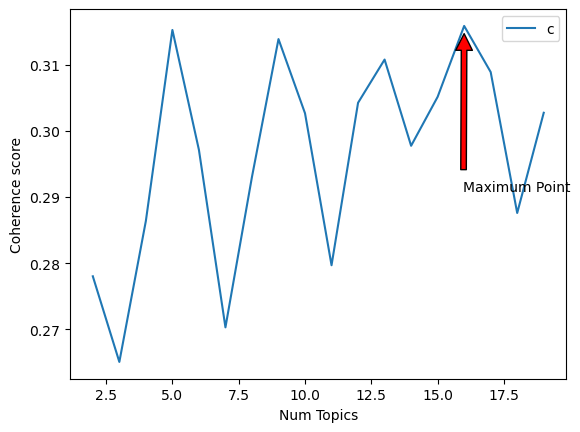

Num Topics = 2  has Coherence Value of 0.278
Num Topics = 3  has Coherence Value of 0.2651
Num Topics = 4  has Coherence Value of 0.2864
Num Topics = 5  has Coherence Value of 0.3153
Num Topics = 6  has Coherence Value of 0.2971
Num Topics = 7  has Coherence Value of 0.2703
Num Topics = 8  has Coherence Value of 0.2931
Num Topics = 9  has Coherence Value of 0.3139
Num Topics = 10  has Coherence Value of 0.3027
Num Topics = 11  has Coherence Value of 0.2797
Num Topics = 12  has Coherence Value of 0.3043
Num Topics = 13  has Coherence Value of 0.3108
Num Topics = 14  has Coherence Value of 0.2978
Num Topics = 15  has Coherence Value of 0.3052
Num Topics = 16  has Coherence Value of 0.3159
Num Topics = 17  has Coherence Value of 0.3089
Num Topics = 18  has Coherence Value of 0.2876
Num Topics = 19  has Coherence Value of 0.3028


In [192]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
max_index = np.argmax(coherence_values)
max_x = x[max_index]
max_y = coherence_values[max_index]

# Plot the data
#plt.plot(x, coherence_values, label='sin(x)')

# Highlight the maximum point with an arrow

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.annotate('Maximum Point',
             xy=(max_x, max_y), 
             xytext=(max_x-0.025, max_y-0.025),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )
plt.legend(("coherence_values"), loc='best')
plt.show()

l=dict()
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    l.update({m:round(cv,4)})

In [181]:
Keymax = max(zip(l.values(), l.keys()))[1]
print("Optimum Number of topics: ",Keymax)

Optimum Number of topics:  16


In [182]:
# Select the model and print the topics
optimal_model = model_list[-4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.035*"app" + 0.017*"netflix" + 0.013*"like" + 0.012*"watch" + '
  '0.012*"movies" + 0.011*"shows" + 0.010*"even" + 0.009*"update" + '
  '0.007*"phone" + 0.007*"ads" + 0.007*"spotify" + 0.006*"one" + 0.006*"tv" + '
  '0.006*"great" + 0.005*"good" + 0.005*"really" + 0.005*"love" + '
  '0.005*"would" + 0.004*"playlist" + 0.004*"songs"'),
 (1,
  '0.030*"app" + 0.028*"netflix" + 0.012*"even" + 0.011*"shows" + '
  '0.010*"movies" + 0.010*"love" + 0.008*"good" + 0.007*"watch" + 0.007*"like" '
  '+ 0.006*"phone" + 0.006*"get" + 0.005*"pay" + 0.005*"want" + 0.005*"time" + '
  '0.005*"tv" + 0.005*"music" + 0.005*"movie" + 0.005*"back" + 0.005*"screen" '
  '+ 0.004*"update"'),
 (2,
  '0.018*"netflix" + 0.012*"app" + 0.009*"would" + 0.008*"watch" + '
  '0.008*"shows" + 0.007*"add" + 0.007*"new" + 0.007*"like" + 0.006*"movies" + '
  '0.006*"songs" + 0.006*"please" + 0.006*"music" + 0.006*"movie" + '
  '0.005*"phone" + 0.005*"update" + 0.005*"every" + 0.005*"also" + '
  '0.004*"series" + 0.

In [166]:
optimal_model = model_list[-4]
#model_topics = optimal_model.get_topics()
#model_topics
pprint(optimal_model.show_topics(num_topics=16))

[(0,
  '0.035*"app" + 0.017*"netflix" + 0.013*"like" + 0.012*"watch" + '
  '0.012*"movies" + 0.011*"shows" + 0.010*"even" + 0.009*"update" + '
  '0.007*"phone" + 0.007*"ads"'),
 (1,
  '0.030*"app" + 0.028*"netflix" + 0.012*"even" + 0.011*"shows" + '
  '0.010*"movies" + 0.010*"love" + 0.008*"good" + 0.007*"watch" + 0.007*"like" '
  '+ 0.006*"phone"'),
 (2,
  '0.018*"netflix" + 0.012*"app" + 0.009*"would" + 0.008*"watch" + '
  '0.008*"shows" + 0.007*"add" + 0.007*"new" + 0.007*"like" + 0.006*"movies" + '
  '0.006*"songs"'),
 (3,
  '0.027*"netflix" + 0.025*"app" + 0.017*"movies" + 0.017*"please" + '
  '0.010*"watch" + 0.009*"even" + 0.007*"phone" + 0.007*"good" + 0.006*"fix" + '
  '0.006*"money"'),
 (4,
  '0.020*"app" + 0.012*"like" + 0.012*"want" + 0.010*"netflix" + '
  '0.010*"series" + 0.009*"watch" + 0.006*"make" + 0.006*"time" + 0.006*"even" '
  '+ 0.006*"phone"'),
 (5,
  '0.041*"app" + 0.018*"netflix" + 0.014*"songs" + 0.013*"song" + '
  '0.012*"music" + 0.012*"good" + 0.011*"even" 

In [169]:
optimal_model.top_topics(corpus=corpus,dictionary=id2word)

[([(0.01558868, 'netflix'),
   (0.012946781, 'like'),
   (0.012913459, 'time'),
   (0.011312908, 'app'),
   (0.009919209, 'spotify'),
   (0.009824581, 'watch'),
   (0.008645776, 'one'),
   (0.008235352, 'movies'),
   (0.007988476, 'ads'),
   (0.007526785, 'new'),
   (0.0071443417, 'want'),
   (0.006560522, 'even'),
   (0.006226542, 'good'),
   (0.0059752506, 'every'),
   (0.005849615, 'pay'),
   (0.0055978266, 'get'),
   (0.005532364, 'listen'),
   (0.005180696, 'free'),
   (0.005143798, 'really'),
   (0.005093146, 'also')],
  -2.273647661464286),
 ([(0.01997599, 'app'),
   (0.012415465, 'like'),
   (0.012207494, 'want'),
   (0.009894077, 'netflix'),
   (0.009568982, 'series'),
   (0.008611173, 'watch'),
   (0.0064360746, 'make'),
   (0.006222233, 'time'),
   (0.0060251653, 'even'),
   (0.0057309233, 'phone'),
   (0.0057023503, 'people'),
   (0.005589875, 'good'),
   (0.005299474, 'back'),
   (0.0052947435, 'movies'),
   (0.0050622076, 'new'),
   (0.0050575584, 'get'),
   (0.0048215436

In [164]:
model_list[-4]

In [34]:
from gensim import corpora, models

In [35]:
from pprint import pprint
# number of topics

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=16,
                                        random_state=0)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"app" + 0.015*"netflix" + 0.012*"movies" + 0.012*"good" + '
  '0.012*"shows" + 0.010*"music" + 0.009*"spotify" + 0.009*"song" + '
  '0.009*"watch" + 0.009*"premium"'),
 (1,
  '0.025*"app" + 0.012*"spotify" + 0.012*"songs" + 0.011*"good" + 0.010*"like" '
  '+ 0.010*"music" + 0.010*"even" + 0.009*"shuffle" + 0.009*"netflix" + '
  '0.008*"watch"'),
 (2,
  '0.016*"app" + 0.014*"netflix" + 0.013*"premium" + 0.010*"please" + '
  '0.010*"song" + 0.010*"get" + 0.009*"spotify" + 0.009*"lyrics" + '
  '0.008*"like" + 0.008*"even"'),
 (3,
  '0.022*"netflix" + 0.013*"app" + 0.008*"movies" + 0.007*"account" + '
  '0.007*"want" + 0.006*"even" + 0.006*"password" + 0.005*"service" + '
  '0.005*"people" + 0.005*"subscription"'),
 (4,
  '0.022*"netflix" + 0.008*"app" + 0.008*"please" + 0.008*"like" + 0.007*"get" '
  '+ 0.007*"watch" + 0.006*"even" + 0.006*"fix" + 0.006*"premium" + '
  '0.006*"shows"'),
 (5,
  '0.037*"netflix" + 0.021*"app" + 0.011*"movies" + 0.010*"like" + '
  '0.010*"watch

In [70]:
def extract_topic_info(lda_model, corpus, dictionary, texts,optimal_num_topics):
    topics_info = {}
    for i in range(optimal_num_topics):
        words = lda_model.show_topic(i, topn=10)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        #print(i,':',coherence_score)
        # Calculate exclusivity (this is a simplistic version, usually exclusivity calculations are more involved)
        topic_words = [word for word, _ in words]
        all_other_topics_words = [lda_model.show_topic(j, topn=10) for j in range(optimal_num_topics) if j != i]
        all_other_words = [word for sublist in all_other_topics_words for word, _ in sublist]
        exclusivity_score = len(set(topic_words) - set(all_other_words)) / len(topic_words)
        
        topics_info[i] = {
            'Top Words and Probabilities': words,
            'Coherence Score': coherence_score,
            'Exclusivity Score': exclusivity_score,
            'Held-out Likelihood': lda_model.log_perplexity(corpus),
            'Topic Prevalence': sum([dict(doc).get(i, 0) for doc in corpus]) / len(corpus),
            'Semantic Interpretability': "High" if coherence_score > 0.5 and exclusivity_score > 0.5 else "Moderate"
        }
    
    return topics_info

In [67]:
topics_info = extract_topic_info(lda_model, corpus, id2word, data_words,optimal_num_topics=1)

In [69]:
# Display topics information for 1st topic
for topic_id, info in topics_info.items():
    print(f"Topic {topic_id + 1}:")
    for key, value in info.items():
        print(f"• {key}: {value}")
    print("\n")

Topic 1:
• Top Words and Probabilities: [('app', 0.03969886), ('song', 0.02517115), ('songs', 0.02510094), ('like', 0.013566997), ('play', 0.010454841), ('even', 0.0101867085), ('netflix', 0.009638592), ('listen', 0.00828453), ('music', 0.006734364), ('watch', 0.006461518)]
• Coherence Score: 0.3159
• Exclusivity Score: 1.0
• Held-out Likelihood: -7.8255240955883005
• Topic Prevalence: 0.0003891353412716943
• Semantic Interpretability: Moderate




In [36]:
print("""Topic 1:Positive Feedback on Apps and Streaming Services
• Top Words and Probabilities: [('app', 0.029385978), ('good', 0.02544726), ('music', 0.011787218), ('netflix', 0.011460284), ('really', 0.009536759), ('watch', 0.009490739), ('new', 0.009047014), ('love', 0.007964538), ('want', 0.0078637535), ('shows', 0.0078357635)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849414197080029
• Topic Prevalence: 0.0003891353412716943
• Semantic Interpretability: Moderate


Topic 2:Netflix Viewing Preferences
• Top Words and Probabilities: [('netflix', 0.027623389), ('app', 0.015914513), ('like', 0.015124402), ('watch', 0.0087224515), ('account', 0.008639276), ('new', 0.00663937), ('want', 0.0064813755), ('shows', 0.0061558834), ('love', 0.0057340963), ('time', 0.005475295)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849440614176544
• Topic Prevalence: 0.0014008872285780996
• Semantic Interpretability: Moderate


Topic 3:Mixed Content Consumption (Movies & Music)
• Top Words and Probabilities: [('app', 0.02500201), ('netflix', 0.016000796), ('songs', 0.014291252), ('spotify', 0.010596367), ('please', 0.008625335), ('one', 0.008235159), ('love', 0.008201974), ('movies', 0.008061158), ('watch', 0.007086108), ('free', 0.0068233204)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.1
• Held-out Likelihood: -7.8498090291586
• Topic Prevalence: 0.0011006971081685068
• Semantic Interpretability: Moderate


Topic 4:Premium Features and Content Access
• Top Words and Probabilities: [('app', 0.027765365), ('spotify', 0.015264838), ('good', 0.012234919), ('premium', 0.011433743), ('netflix', 0.011232896), ('shows', 0.010443622), ('songs', 0.007992479), ('pay', 0.0073245657), ('movies', 0.0072666802), ('time', 0.006906462)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849577506846771
• Topic Prevalence: 0.0010228700399141678
• Semantic Interpretability: Moderate


Topic 5:General App Usage & Experience
• Top Words and Probabilities: [('app', 0.052299645), ('netflix', 0.018731847), ('like', 0.010744107), ('movies', 0.008380566), ('spotify', 0.008224077), ('even', 0.0080795875), ('watch', 0.0074526314), ('good', 0.0073796334), ('great', 0.006722647), ('premium', 0.006687211)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.1
• Held-out Likelihood: -7.8495389834729385
• Topic Prevalence: 0.2475123133540131
• Semantic Interpretability: Moderate


Topic 6:Issues and Requests for Improvement
• Top Words and Probabilities: [('app', 0.028806945), ('netflix', 0.018402776), ('movies', 0.014667085), ('watch', 0.012383216), ('even', 0.0106156), ('tv', 0.008154114), ('please', 0.007493956), ('song', 0.007002109), ('series', 0.0064411904), ('fix', 0.006076207)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.2
• Held-out Likelihood: -7.849477602314616
• Topic Prevalence: 0.043227377338981354
• Semantic Interpretability: Moderate


Topic 7:Content Requests and Subscription Preferences
• Top Words and Probabilities: [('song', 0.04090684), ('netflix', 0.016021904), ('app', 0.013184261), ('please', 0.01198136), ('one', 0.011029195), ('good', 0.009733944), ('want', 0.0075860177), ('premium', 0.0071313004), ('shows', 0.0064189336), ('movies', 0.0062646195)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849587794365401
• Topic Prevalence: 0.10044139065852818
• Semantic Interpretability: Moderate


Topic 8:App Functionality and Updates
• Top Words and Probabilities: [('app', 0.022176336), ('like', 0.013010181), ('netflix', 0.01285594), ('even', 0.010276358), ('songs', 0.01006168), ('update', 0.009898444), ('shuffle', 0.009655116), ('song', 0.00881316), ('playlist', 0.007920581), ('play', 0.00760758)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.2
• Held-out Likelihood: -7.849576251788242
• Topic Prevalence: 0.0011562878712073202
• Semantic Interpretability: Moderate


Topic 9:App Performance and Content Access
• Top Words and Probabilities: [('netflix', 0.02718641), ('app', 0.026019001), ('like', 0.008294825), ('get', 0.0073734694), ('really', 0.0072275684), ('good', 0.007174675), ('still', 0.0069649974), ('movies', 0.006695336), ('shows', 0.0066893487), ('account', 0.0065082503)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.1
• Held-out Likelihood: -7.849530152717453
• Topic Prevalence: 0.04118163725915302
• Semantic Interpretability: Moderate


Topic 10:Music and Video Streaming Preferences
• Top Words and Probabilities: [('app', 0.026506023), ('netflix', 0.022193672), ('spotify', 0.021995494), ('watch', 0.012565841), ('listen', 0.011946241), ('want', 0.010558529), ('like', 0.009517964), ('please', 0.007191673), ('even', 0.0070195724), ('ads', 0.0070004375)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.8496302955028066
• Topic Prevalence: 0.00022236305215525388
• Semantic Interpretability: Moderate


Topic 11: Music Streaming and Premium Services
• Top Words and Probabilities: [('music', 0.02130871), ('app', 0.019616388), ('netflix', 0.014046016), ('new', 0.010136444), ('premium', 0.009020147), ('like', 0.008278882), ('spotify', 0.008164835), ('even', 0.007833174), ('ads', 0.00783121), ('good', 0.0076198317)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849497055177817
• Topic Prevalence: 0.014309062406190587
• Semantic Interpretability: Moderate


Topic 12:Content Accessibility and Technical Issues
• Top Words and Probabilities: [('netflix', 0.021963716), ('app', 0.020626659), ('premium', 0.011436338), ('even', 0.009169038), ('one', 0.008449116), ('fix', 0.0076555605), ('song', 0.0072563426), ('songs', 0.007252644), ('get', 0.006582377), ('good', 0.006190705)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849560911614236
• Topic Prevalence: 0.6327229467551672
• Semantic Interpretability: Moderate


Topic 13:Content Value and Spending Impact"
• Top Words and Probabilities: [('watch', 0.017648973), ('app', 0.01756091), ('netflix', 0.015315652), ('shows', 0.008122737), ('money', 0.0075862114), ('get', 0.007150792), ('time', 0.006896452), ('like', 0.006714104), ('love', 0.006609978), ('would', 0.0064988052)]
• Coherence Score: n0.3159
• Exclusivity Score: 0.1
• Held-out Likelihood: -7.849535422307262
• Topic Prevalence: 0.07633723580489866
• Semantic Interpretability: Moderate


Topic 14:Music App Functionality
• Top Words and Probabilities: [('app', 0.028240362), ('songs', 0.027176315), ('music', 0.0155313015), ('even', 0.013405285), ('play', 0.011164321), ('listen', 0.010992815), ('song', 0.00907143), ('movies', 0.008977271), ('netflix', 0.008819938), ('like', 0.008501385)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.8495209663214
• Topic Prevalence: 0.0005559076303881347
• Semantic Interpretability: Moderate


Topic 15:Premium Content and User Preferences
• Top Words and Probabilities: [('app', 0.023664853), ('netflix', 0.01576395), ('spotify', 0.0146356635), ('song', 0.013067896), ('even', 0.012876092), ('premium', 0.012006517), ('like', 0.011683245), ('playlist', 0.008635625), ('one', 0.008209535), ('money', 0.007984225)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849472453111168
• Topic Prevalence: 0.013897690759703367
• Semantic Interpretability: Moderate


Topic 16:App Usability and Ad Experience
• Top Words and Probabilities: [('netflix', 0.03161724), ('like', 0.017091295), ('app', 0.015571456), ('watch', 0.010637827), ('even', 0.009960085), ('get', 0.008844794), ('ads', 0.008544588), ('pay', 0.007953123), ('lyrics', 0.007899856), ('one', 0.007893182)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.1
• Held-out Likelihood: -7.849578271052172
• Topic Prevalence: 0.014353535016621639
• Semantic Interpretability: Moderate
""")

Topic 1:Positive Feedback on Apps and Streaming Services
• Top Words and Probabilities: [('app', 0.029385978), ('good', 0.02544726), ('music', 0.011787218), ('netflix', 0.011460284), ('really', 0.009536759), ('watch', 0.009490739), ('new', 0.009047014), ('love', 0.007964538), ('want', 0.0078637535), ('shows', 0.0078357635)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849414197080029
• Topic Prevalence: 0.0003891353412716943
• Semantic Interpretability: Moderate


Topic 2:Netflix Viewing Preferences
• Top Words and Probabilities: [('netflix', 0.027623389), ('app', 0.015914513), ('like', 0.015124402), ('watch', 0.0087224515), ('account', 0.008639276), ('new', 0.00663937), ('want', 0.0064813755), ('shows', 0.0061558834), ('love', 0.0057340963), ('time', 0.005475295)]
• Coherence Score: 0.3159
• Exclusivity Score: 0.0
• Held-out Likelihood: -7.849440614176544
• Topic Prevalence: 0.0014008872285780996
• Semantic Interpretability: Moderate


Topic 3:Mixed Con

In [37]:
df = pd.read_csv('Final_Entertainment2.csv')

In [38]:
df= df[df['content'].str.strip() != '']
df = df.dropna(subset=['content'])


In [39]:
# Assuming df is your DataFrame with a 'score' column
def sample_and_duplicate(df, target_samples=10000):
    def sample_with_duplication(group):
        sampled = group.sample(n=min(len(group), target_samples), random_state=1)
        if len(sampled) < target_samples:
            # Duplicate the data if not enough samples
            required_samples = target_samples - len(sampled)
            sampled = pd.concat([sampled, sampled.sample(n=required_samples, replace=True, random_state=1)])
        return sampled

    sampled_df = df.groupby('score').apply(sample_with_duplication).reset_index(drop=True)
    return sampled_df

# Call the function
sampled_df = sample_and_duplicate(df, target_samples=10000)

In [40]:
sampled_df['score'].value_counts()

score
1.0    10000
2.0    10000
3.0    10000
4.0    10000
5.0    10000
Name: count, dtype: int64

In [41]:
data = df.content.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

In [42]:
dictionary = corpora.Dictionary.load('dictionary.dict')

In [43]:
lda_model_loaded = models.LdaModel.load('lda_model.gensim')

In [44]:
# Tokenize the reviews
sampled_df['tokens'] = sampled_df['content'].apply(lambda x: x.split())  # Assuming space-separated tokens

# Convert sampled reviews to corpus
sampled_corpus = [dictionary.doc2bow(tokens) for tokens in sampled_df['tokens']]

In [45]:
# Function to get topic probabilities for each review
def get_topic_probabilities(lda_model, corpus, num_topics):
    topic_probs = np.zeros((len(corpus), num_topics))
    for i, bow in enumerate(corpus):
        topics_prob = lda_model.get_document_topics(bow, minimum_probability=0)
        for topic_id, prob in topics_prob:
            topic_probs[i, topic_id] = prob
    return topic_probs


In [46]:
# Get the number of topics
#num_topics = len(lda_model_loaded.get_topics())
num_topics = len(lda_model.get_topics())

# Get topic probabilities for the sampled reviews
#topic_probs = get_topic_probabilities(lda_model_loaded, sampled_corpus, num_topics)
topic_probs = get_topic_probabilities(lda_model, corpus, num_topics)

In [47]:
# Prepare the DataFrame for regression analysis
topic_columns = ['Positive Feedback on Apps and Streaming Services','Netflix Viewing Preferences',
                 'Mixed Content Consumption (Movies & Music)',
                'Premium Features and Content Access','General App Usage & Experience','Issues and Requests for Improvement',
                'Specific Requests and Preferences','App Functionality and Updates','App Performance and Content Access',
                'Music and Video Streaming Preferences','Music Streaming and Premium Services',
                 'Content Accessibility and Technical Issues',
                'Netflix Content and Viewing Experience','Music App Functionality',
                'Premium Content and User Preferences','App Usability and Ad Experience']
topic_probs_df = pd.DataFrame(topic_probs, columns=topic_columns)


In [48]:
# Concatenate review text, rating, and topic probabilities
regression_df = pd.concat([sampled_df[['content', 'score']], topic_probs_df], axis=1)

# Save the matrix to a CSV file
regression_df.to_csv('reviewd_topic_prob_new_50000_v2.csv', index=False)

print("Review-topic probabilities matrix for 2000 reviews per rating category saved to 'review_topic_probabilities_for_regression.csv'.")

Review-topic probabilities matrix for 2000 reviews per rating category saved to 'review_topic_probabilities_for_regression.csv'.


In [49]:
regression_df['score'].value_counts()

score
1.0    10000
2.0    10000
3.0    10000
4.0    10000
5.0    10000
Name: count, dtype: int64

In [50]:
# Get topic distributions for each document
topic_document_matrix = lda_model[corpus]

In [51]:
# Initialize an array to store the sum of topic weights
topic_weights = np.zeros(num_topics)

In [52]:
# Sum up the topic weights across all documents
for doc in topic_document_matrix:
    for topic_id, weight in doc:
        topic_weights[topic_id] += weight


In [53]:
# Calculate the overall weight (sum of all topic weights)
overall_weight = np.sum(topic_weights)

# Calculate percentage importance of each topic
percentage_importance = (topic_weights / overall_weight) * 100

In [54]:
# Create a DataFrame to hold the results
topic_labels = ['Positive Feedback on Apps and Streaming Services','Netflix Viewing Preferences',
                 'Mixed Content Consumption (Movies & Music)',
                'Premium Features and Content Access','General App Usage & Experience','Issues and Requests for Improvement',
                'Content Requests and Subscription Preferences','App Functionality and Updates','App Performance and Content Access',
                'Music and Video Streaming Preferences','Music Streaming and Premium Services',
                 'Content Accessibility and Technical Issues',
                'Content Value and Spending Impact"','Music App Functionality',
                'Premium Content and User Preferences','App Usability and Ad Experience']
importance_df = pd.DataFrame({
    'Topic': topic_labels,
    'Percentage Importance': percentage_importance
})


In [55]:
# Add topic terms to the DataFrame for context
topic_terms = []
for i in range(num_topics):
    terms = lda_model.show_topic(i, topn=10)  # Top 10 terms per topic
    terms_str = ", ".join([term for term, _ in terms])
    topic_terms.append(terms_str)

importance_df['Top Terms'] = topic_terms

In [56]:
importance_df

,Topic,Percentage Importance,Top Terms
0,Positive Feedback on Apps and Streaming Services,2.390363,"app, netflix, movies, good, shows, music, spot..."
1,Netflix Viewing Preferences,8.619588,"app, spotify, songs, good, like, music, even, ..."
2,Mixed Content Consumption (Movies & Music),5.383782,"app, netflix, premium, please, song, get, spot..."
3,Premium Features and Content Access,1.644448,"netflix, app, movies, account, want, even, pas..."
4,General App Usage & Experience,2.658447,"netflix, app, please, like, get, watch, even, ..."
5,Issues and Requests for Improvement,7.502013,"netflix, app, movies, like, watch, account, go..."
6,Content Requests and Subscription Preferences,4.583387,"netflix, app, like, watch, movies, please, sho..."
7,App Functionality and Updates,3.920182,"song, app, one, netflix, premium, new, update,..."
8,App Performance and Content Access,3.216822,"app, netflix, spotify, pay, money, playlist, l..."
9,Music and Video Streaming Preferences,6.655407,"app, netflix, music, spotify, even, songs, pre..."


In [57]:
# Export to Excel
importance_df.to_excel('topic_terms_importance_v2.xlsx', index=False)

In [58]:
dff=pd.read_csv(r"C:\Users\ponuku vijay\Desktop\NLP 3\reviewd_topic_prob_new_50000_v2.csv")

C:\Users\ponuku vijay\AppData\Local\Temp\ipykernel_53684\2813321601.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dff=pd.read_csv(r"C:\Users\ponuku vijay\Desktop\NLP 3\reviewd_topic_prob_new_50000_v2.csv")


In [59]:
dff

,content,score,Positive Feedback on Apps and Streaming Services,Netflix Viewing Preferences,Mixed Content Consumption (Movies & Music),Premium Features and Content Access,General App Usage & Experience,Issues and Requests for Improvement,Specific Requests and Preferences,App Functionality and Updates,App Performance and Content Access,Music and Video Streaming Preferences,Music Streaming and Premium Services,Content Accessibility and Technical Issues,Netflix Content and Viewing Experience,Music App Functionality,Premium Content and User Preferences,App Usability and Ad Experience
0,spotify let use downloaded song offline functi...,1.0,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.927784,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814
1,choice give star give single star app it app g...,1.0,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.847642,0.001787,0.127346,0.001787
2,keep crashing matter do premium cleared cache ...,1.0,0.002413,0.963808,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413
3,song playing always showing connected internet...,1.0,0.003913,0.003913,0.003913,0.003913,0.941303,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913
4,need netflix kid anymore m sick putting garbag...,1.0,0.001454,0.001454,0.001454,0.001454,0.001454,0.823678,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.155964,0.001454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89938,NaN,NaN,0.001896,0.001896,0.001896,0.001896,0.001896,0.001896,0.001896,0.001896,0.001896,0.687510,0.001896,0.001896,0.285953,0.001896,0.001896,0.001896
89939,NaN,NaN,0.004465,0.004465,0.004465,0.004465,0.004465,0.004465,0.933019,0.004465,0.004465,0.004465,0.004465,0.004465,0.004465,0.004465,0.004465,0.004472
89940,NaN,NaN,0.002719,0.071085,0.002719,0.002719,0.002719,0.002719,0.002719,0.002719,0.002719,0.002719,0.002719,0.002719,0.002719,0.002719,0.890850,0.002719
89941,NaN,NaN,0.005686,0.359836,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.560554,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686,0.005686


In [60]:

# 1. Drop all rows where the 'score' column is NaN
dff = dff.dropna(subset=['score'])

# 2. Display the cleaned DataFrame (optional)
print("DataFrame after removing rows with NaN in 'score':")
dff


DataFrame after removing rows with NaN in 'score':


,content,score,Positive Feedback on Apps and Streaming Services,Netflix Viewing Preferences,Mixed Content Consumption (Movies & Music),Premium Features and Content Access,General App Usage & Experience,Issues and Requests for Improvement,Specific Requests and Preferences,App Functionality and Updates,App Performance and Content Access,Music and Video Streaming Preferences,Music Streaming and Premium Services,Content Accessibility and Technical Issues,Netflix Content and Viewing Experience,Music App Functionality,Premium Content and User Preferences,App Usability and Ad Experience
0,spotify let use downloaded song offline functi...,1.0,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.927784,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814
1,choice give star give single star app it app g...,1.0,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.847642,0.001787,0.127346,0.001787
2,keep crashing matter do premium cleared cache ...,1.0,0.002413,0.963808,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413
3,song playing always showing connected internet...,1.0,0.003913,0.003913,0.003913,0.003913,0.941303,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913
4,need netflix kid anymore m sick putting garbag...,1.0,0.001454,0.001454,0.001454,0.001454,0.001454,0.823678,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.155964,0.001454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,really like listen stuff like watch show movie...,5.0,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.318215,0.626595,0.003942
49996,extensive playlist easy organize could use bet...,5.0,0.001525,0.782855,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.195794
49997,spotify great music listening app able pick so...,5.0,0.119277,0.001150,0.001150,0.001150,0.390522,0.475255,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150
49998,love hate add payment method zimbabwe use eco ...,5.0,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.953006,0.003133


In [63]:
dff.to_excel('REVIEWED_topic_prob_new_50000_v2.xlsx', index=False)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
dff = pd.read_excel('REVIEWED_topic_prob_new_50000_v2.xlsx',sheet_name="Sheet1")

In [66]:
dff

,content,score,Positive Feedback on Apps and Streaming Services,Netflix Viewing Preferences,Mixed Content Consumption (Movies & Music),Premium Features and Content Access,General App Usage & Experience,Issues and Requests for Improvement,Specific Requests and Preferences,App Functionality and Updates,App Performance and Content Access,Music and Video Streaming Preferences,Music Streaming and Premium Services,Content Accessibility and Technical Issues,Netflix Content and Viewing Experience,Music App Functionality,Premium Content and User Preferences,App Usability and Ad Experience
0,spotify let use downloaded song offline functi...,1,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.927784,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814,0.004814
1,choice give star give single star app it app g...,1,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.001787,0.847642,0.001787,0.127346,0.001787
2,keep crashing matter do premium cleared cache ...,1,0.002413,0.963808,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413,0.002413
3,song playing always showing connected internet...,1,0.003913,0.003913,0.003913,0.003913,0.941303,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913,0.003913
4,need netflix kid anymore m sick putting garbag...,1,0.001454,0.001454,0.001454,0.001454,0.001454,0.823678,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.001454,0.155964,0.001454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,really like listen stuff like watch show movie...,5,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.003942,0.318215,0.626595,0.003942
49996,extensive playlist easy organize could use bet...,5,0.001525,0.782855,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.001525,0.195794
49997,spotify great music listening app able pick so...,5,0.119277,0.001150,0.001150,0.001150,0.390522,0.475255,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150
49998,love hate add payment method zimbabwe use eco ...,5,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.003133,0.953006,0.003133


In [67]:
df_y=dff['score']
df_x=dff.drop(['content','score'],axis=1)

In [68]:
from sklearn.linear_model import LogisticRegression, LinearRegression
model=LinearRegression()
model.fit(df_x,df_y)

LinearRegression()

In [69]:

# 1. Count the number of NaN values in the Series
num_nan_values = df_y.isna().sum()

print(f"Number of NaN values in the Series: {num_nan_values}")

Number of NaN values in the Series: 0


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, roc_auc_score

In [71]:
import statsmodels.api as sm

In [72]:
sm_model = sm.OLS(df_y,df_x.astype(float)).fit()
sm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Ordinary least squares
==============================================================================================
Model:                       OLS                  Adj. R-squared (uncentered):     0.838      
Dependent Variable:          score                AIC:                             170658.9494
Date:                        2024-08-31 16:22     BIC:                             170800.0659
No. Observations:            50000                Log-Likelihood:                  -85313.    
Df Model:                    16                   F-statistic:                     1.622e+04  
Df Residuals:                49984                Prob (F-statistic):              0.00       
R-squared (uncentered):      0.838                Scale:                           1.7771     
----------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
----------------------------------------------------------------------------------------------
Positive Feedback on Apps and Streaming Services 2.8045   0.0422  66.5315 0.0000 2.7219 2.8871
Netflix Viewing Preferences                      3.6723   0.0282 130.2628 0.0000 3.6171 3.7276
Mixed Content Consumption (Movies & Music)       3.1023   0.0307 101.1816 0.0000 3.0422 3.1624
Premium Features and Content Access              2.3902   0.0487  49.0604 0.0000 2.2947 2.4857
General App Usage & Experience                   2.7405   0.0392  69.9390 0.0000 2.6637 2.8173
Issues and Requests for Improvement              2.2443   0.0195 115.0346 0.0000 2.2061 2.2826
Specific Requests and Preferences                2.4053   0.0255  94.2244 0.0000 2.3553 2.4553
App Functionality and Updates                    3.1626   0.0381  83.1033 0.0000 3.0880 3.2371
App Performance and Content Access               2.9344   0.0408  71.9715 0.0000 2.8545 3.0143
Music and Video Streaming Preferences            3.5379   0.0305 115.8696 0.0000 3.4781 3.5978
Music Streaming and Premium Services             2.4884   0.0268  92.8783 0.0000 2.4359 2.5409
Content Accessibility and Technical Issues       2.7882   0.0458  60.9348 0.0000 2.6985 2.8779
Netflix Content and Viewing Experience           2.7968   0.0207 135.0359 0.0000 2.7562 2.8374
Music App Functionality                          2.7494   0.0433  63.5543 0.0000 2.6646 2.8341
Premium Content and User Preferences             3.8524   0.0174 221.3583 0.0000 3.8183 3.8866
App Usability and Ad Experience                  3.3292   0.0253 131.4013 0.0000 3.2796 3.3789
----------------------------------------------------------------------------------------------
Omnibus:                      17324.296               Durbin-Watson:                  0.200   
Prob(Omnibus):                0.000                   Jarque-Bera (JB):               2692.756
Skew:                         -0.193                  Prob(JB):                       0.000   
Kurtosis:                     1.931                   Condition No.:                  3       
==============================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the                 model does not
contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(X):
    #X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(np.array(X,dtype='float'), i) for i in range(X.shape[1])]
    vif_factors = pd.DataFrame({'COLUMN':X.columns,
                                 'VIF': vif})
    return vif_factors

vif_factors = get_vif(df_x)
vif_factors.head(16)

,COLUMN,VIF
0,Positive Feedback on Apps and Streaming Services,1.006875
1,Netflix Viewing Preferences,1.010692
2,Mixed Content Consumption (Movies & Music),1.007941
3,Premium Features and Content Access,1.007827
4,General App Usage & Experience,1.006416
5,Issues and Requests for Improvement,1.011566
6,Specific Requests and Preferences,1.007793
7,App Functionality and Updates,1.007774
8,App Performance and Content Access,1.007379
9,Music and Video Streaming Preferences,1.007905


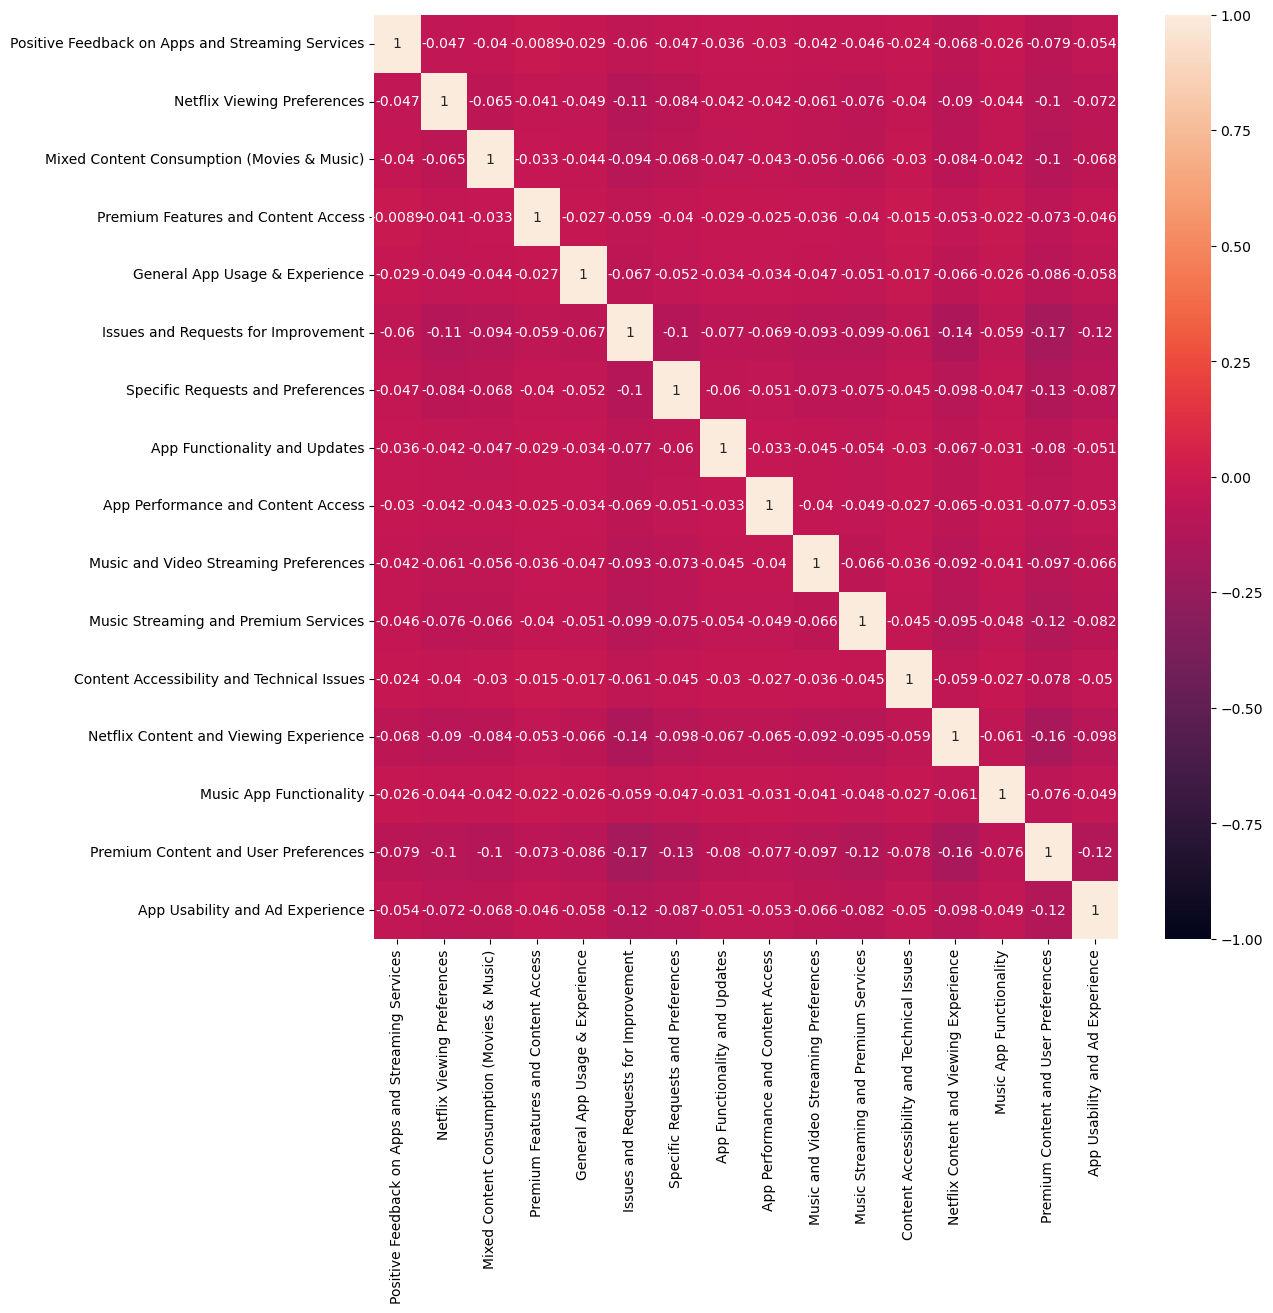

In [74]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data=df_x.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

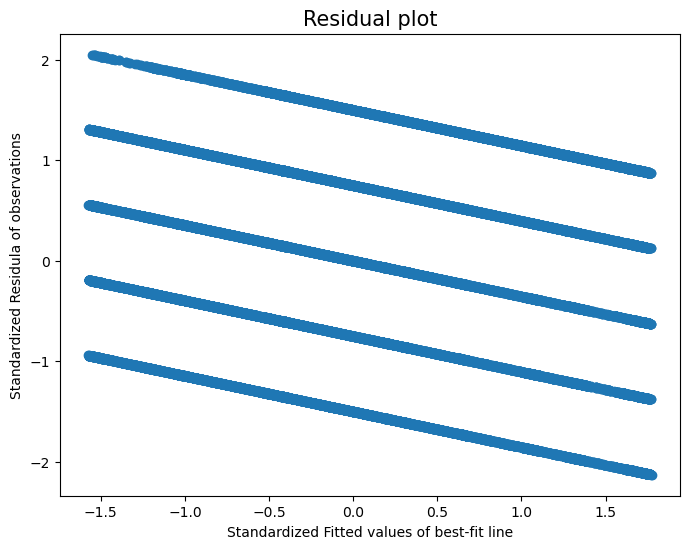

In [75]:
def get_std_values(val):
    std_val = (val - val.mean())/val.std()
    return std_val

# Residule plot
def residual_plot(fitted, residual, title):
    plt.figure(figsize=(8,6))
    plt.scatter(get_std_values(fitted),
                get_std_values(residual))
    plt.title(title, fontsize=15)
    plt.xlabel("Standardized Fitted values of best-fit line")
    plt.ylabel("Standardized Residula of observations")
    plt.show()
    
residual_plot(sm_model.fittedvalues, sm_model.resid, 'Residual plot')

In [76]:
#!pip install dominance_analysis
from dominance_analysis import Dominance


# Combine X_1 and y_1 back into a DataFrame for dominance analysis
Reg_subset = pd.concat([df_x, df_y], axis=1)

# Initialize the dominance analysis
dominance = Dominance(data=Reg_subset, target='score', top_k=None)

# Perform dominance analysis
dominance.incremental_rsquare()

# Get the dominance analysis results
dominance_results = dominance.dominance_stats()

# Print the dominance analysis summary
print("\nDominance Analysis Summary:")
print(dominance_results)

Loading BokehJS ...

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['Positive Feedback on Apps and Streaming Services', 'Netflix Viewing Preferences', 'Mixed Content Consumption (Movies & Music)', 'Premium Features and Content Access', 'General App Usage & Experience', 'Issues and Requests for Improvement', 'Specific Requests and Preferences', 'App Functionality and Updates', 'Music and Video Streaming Preferences', 'Music Streaming and Premium Services', 'Content Accessibility and Technical Issues', 'Netflix Content and Viewing Experience', 'Music App Functionality', 'Premium Content and User Preferences', 'App Usability and Ad Experience']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.11173509267913384

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['Positive Feedback on Apps and Streaming Services', 'Netflix Viewing Preferences', 'Mixed Content Consumption (Movies & Music)', 'Premium Features and Content Access', 'General

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [08:17<00:00, 33.15s/it]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [02:49<00:00, 12.11s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################


Dominance Analysis Summary:
                                                 Interactional Dominance  \
Premium Content and User Preferences                            0.007485   
Issues and Requests for Improvement                             0.004069   
Netflix Viewing Preferences                                     0.003852   
Specific Requests and Preferences                               0.002114   
Music Streaming and Premium Services                            0.001461   
Music and Video Streaming Preferences                           0.002448   
App Usability and Ad Experience                                 0.001182   
Premium Features and Content Access                             0.001283   
Netflix Content and Viewing Experience                          0.000158   
General App Usage & Experience                                  0.000206   
Mixed Content Consumption (Movies & Mus

In [77]:
import prince

In [78]:
df_corr=pd.read_excel(r"C:\Users\ponuku vijay\Desktop\NLP 3\REVIEWED_topic_prob_new_50000_v2.xlsx",sheet_name="Sheet3")
df_corr

,Ratings,App Functionality and Updates,App Performance and Content Access,App Usability and Ad Experience,Content Accessibility and Technical Issues,General App Usage & Experience,Issues and Requests for Improvement,Mixed Content Consumption (Movies & Music),Music and Video Streaming Preferences,Music App Functionality,Music Streaming and Premium Services,Netflix Content and Viewing Experience,Netflix Viewing Preferences,Positive Feedback on Apps and Streaming Services,Premium Content and User Preferences,Premium Features and Content Access,Specific Requests and Preferences
0,1,313,319,692,175,329,1722,486,427,277,944,1269,441,289,1085,243,989
1,2,323,344,686,218,342,1845,485,469,347,856,1124,467,360,965,260,909
2,3,367,310,604,561,419,1326,689,424,268,704,1242,535,290,1108,309,844
3,4,334,236,748,175,356,1437,490,408,269,582,1385,673,297,1552,162,896
4,5,395,298,1204,63,153,86,525,1021,148,346,719,1114,165,3627,39,97


In [79]:
# Initialize the Correspondence Analysis model
ca = prince.CA(n_components=2, random_state=42)

# Fit the model to the data (excluding the 'Ratings' column)
ca = ca.fit(df_corr.set_index('Ratings'))

# Get the row and column coordinates
row_coordinates = ca.row_coordinates(df_corr.set_index('Ratings'))
column_coordinates = ca.column_coordinates(df_corr.set_index('Ratings'))

# Display the row and column coordinates
print("Row Coordinates:\n", row_coordinates)
print("\nColumn Coordinates:\n", column_coordinates)

Row Coordinates:
                 0         1
Ratings                    
1       -0.237028 -0.092825
2       -0.257439 -0.072102
3       -0.197068  0.219313
4       -0.065175 -0.053303
5        0.756710 -0.001082

Column Coordinates:
                                                          0         1
App Functionality and Updates                     0.071325  0.050296
App Performance and Content Access               -0.026154  0.003909
App Usability and Ad Experience                   0.266397 -0.050046
Content Accessibility and Technical Issues       -0.375307  0.602090
General App Usage & Experience                   -0.253953  0.096455
Issues and Requests for Improvement              -0.475835 -0.107860
Mixed Content Consumption (Movies & Music)       -0.010212  0.145643
Music and Video Streaming Preferences             0.417048 -0.010600
Music App Functionality                          -0.225352 -0.043331
Music Streaming and Premium Services             -0.272221 -0.067459
Netfl

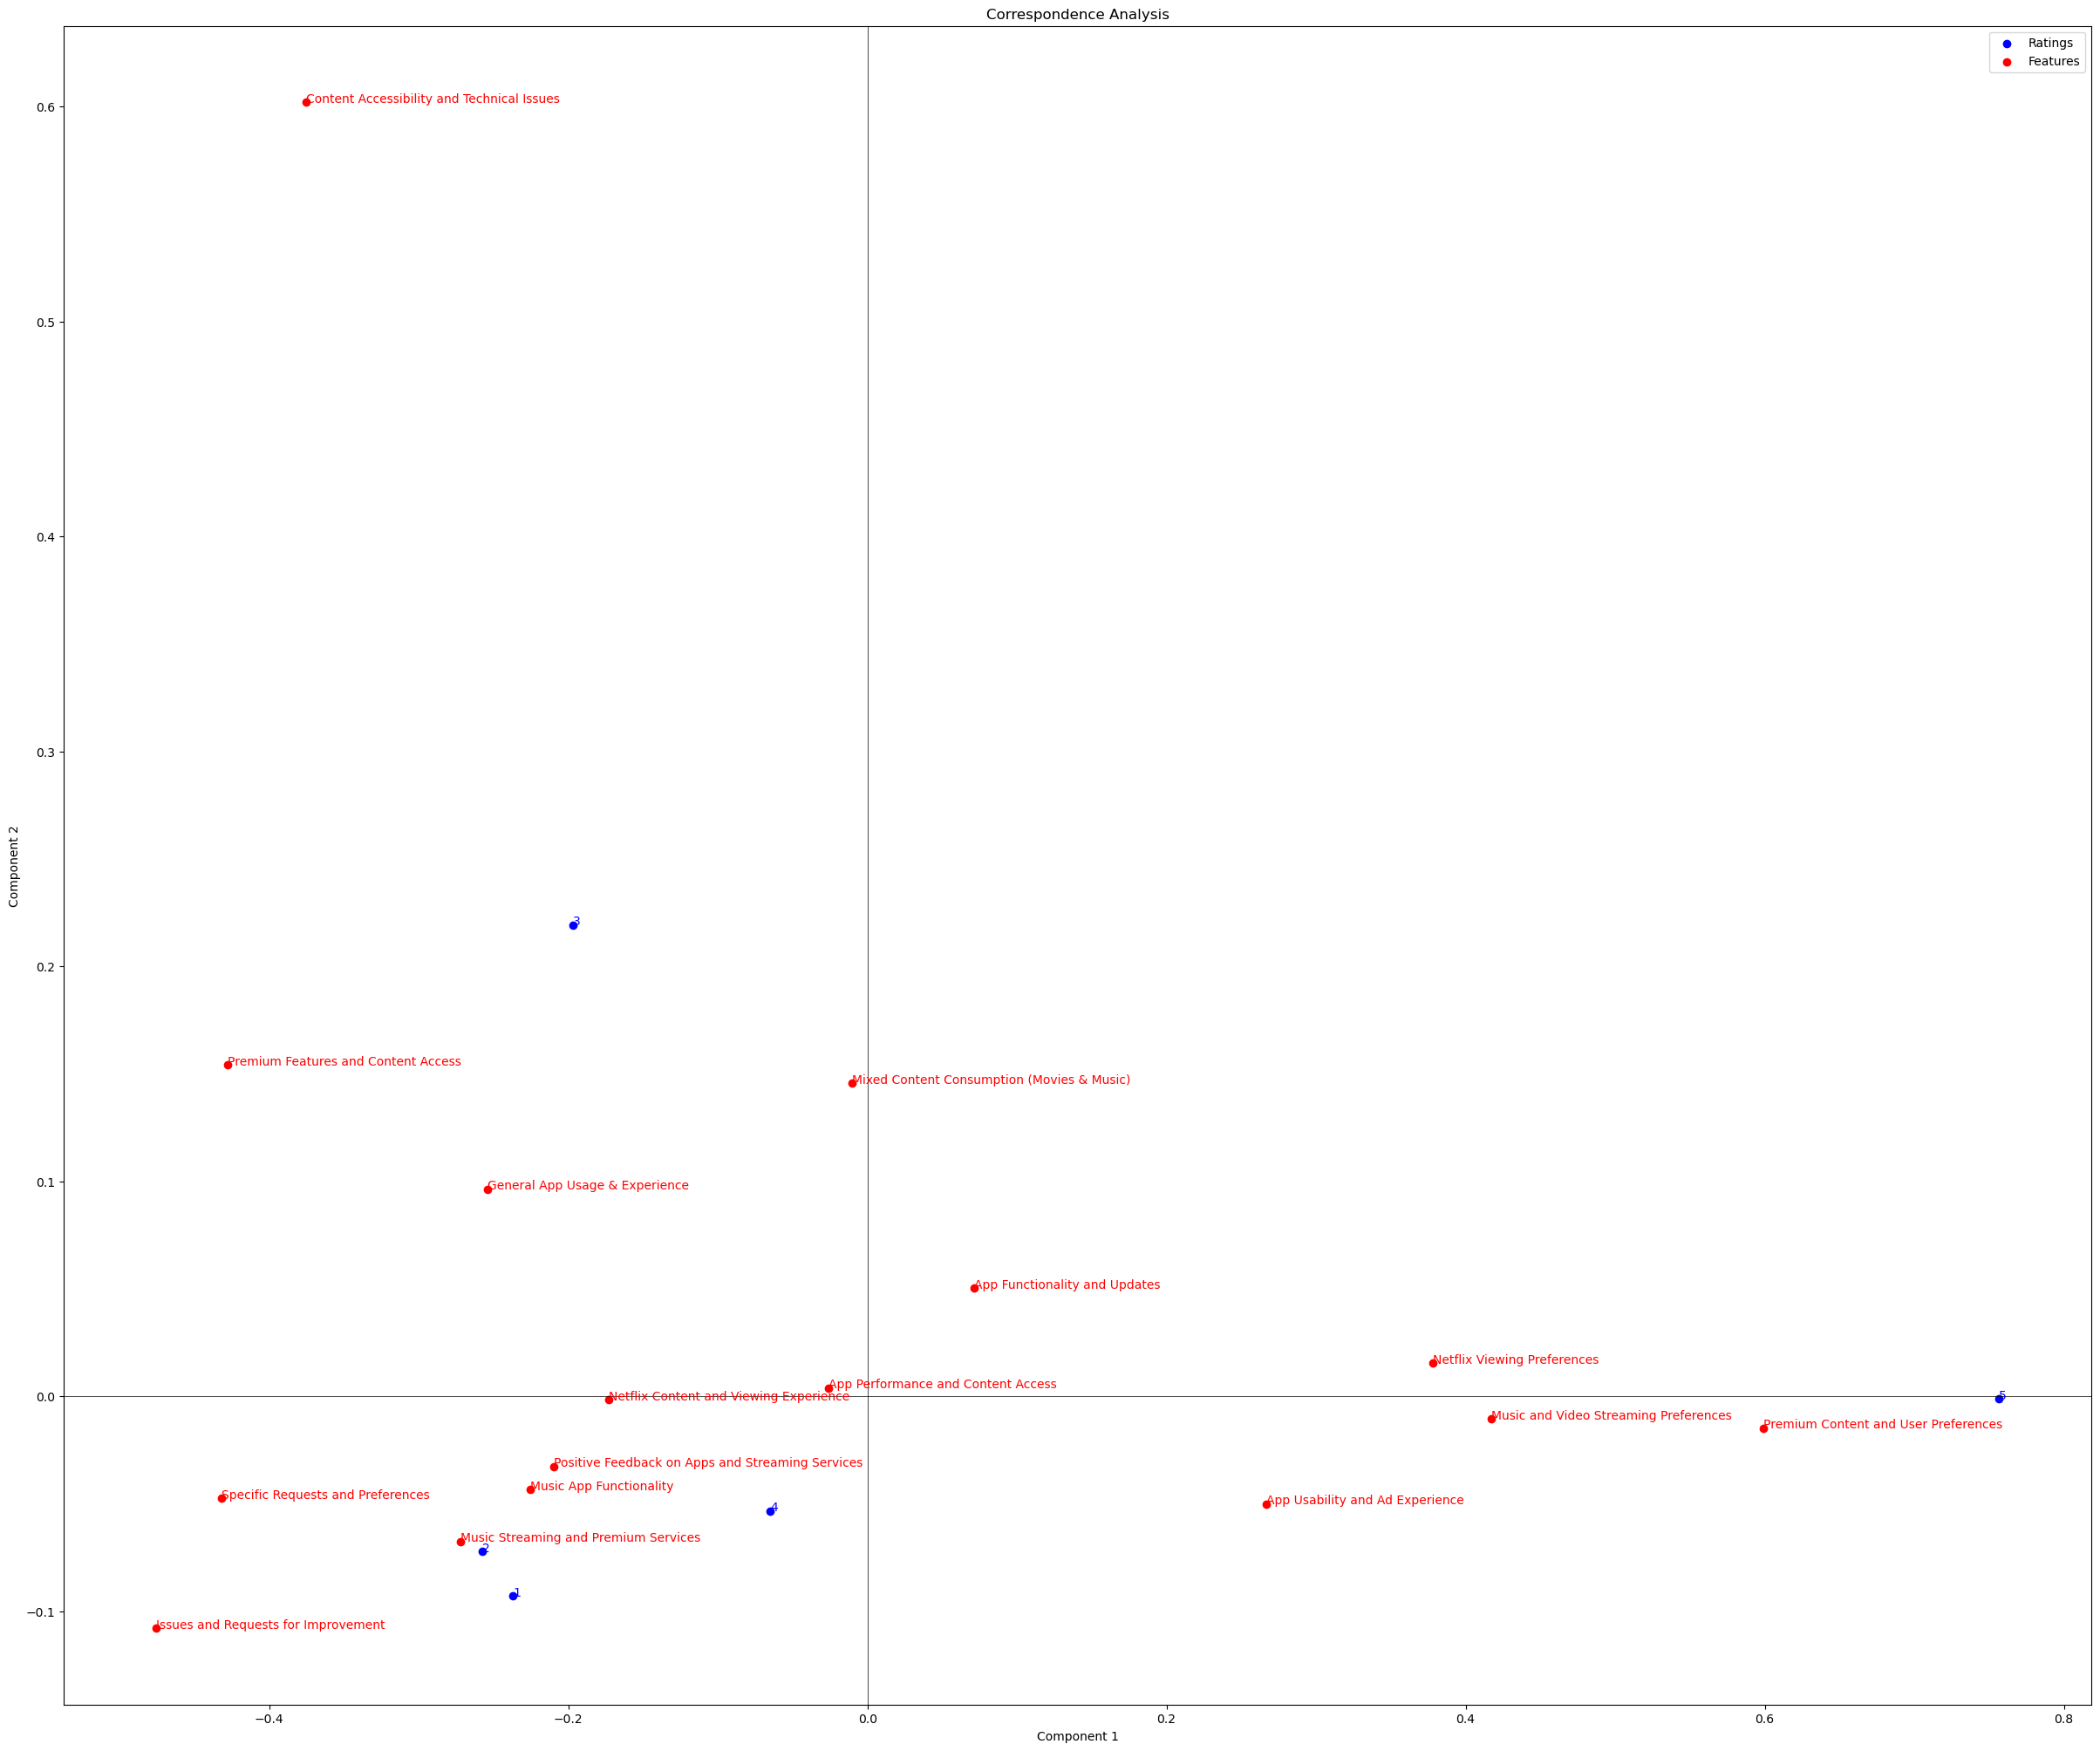

In [80]:
import matplotlib.pyplot as plt

# Plot the row coordinates
plt.figure(figsize=(30, 25))
plt.scatter(row_coordinates.iloc[:, 0], row_coordinates.iloc[:, 1], c='blue', label='Ratings')
plt.rcParams.update({'font.size': 10})
# Annotate the rows
for i, txt in enumerate(row_coordinates.index):
    plt.annotate(txt, (row_coordinates.iloc[i, 0], row_coordinates.iloc[i, 1]), color='blue')

# Plot the column coordinates
plt.scatter(column_coordinates.iloc[:, 0], column_coordinates.iloc[:, 1], c='red', label='Features')

# Annotate the columns
for i, txt in enumerate(column_coordinates.index):
    plt.annotate(txt, (column_coordinates.iloc[i, 0], column_coordinates.iloc[i, 1]), color='red')

# Add labels and legend
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Correspondence Analysis')

# Remove all grid lines
plt.grid(False)

# Add grid lines only at the origin
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Add legend and show plot
plt.legend()
plt.show()